In [1]:
from math import factorial, comb

import numpy as np
import matplotlib.pyplot as plt

In [25]:
def run_sim():
    calls = np.random.randint(1, 8, 12)
    calls_set = set(calls)

    return 1 if len(calls_set) == 7 else 0

In [30]:
tsum = 0
iters = 100000

for i in range(iters):
    tsum += run_sim()

print(tsum/iters)

0.22776


In [46]:
numer = comb(31, 15) ** 7 * comb(29, 15) * comb(30, 15) ** 4 #* factorial(180)

In [47]:
denom = comb(366, 186)

In [48]:
numer/denom

1.6672947199721384e-09

# Monty Hall problem sim

In [12]:
def run_sim(iters=1000):
    stayer_score = 0
    changer_score = 0
    
    for i in range(iters):
        res = run_goat(10)
        if res == "STAY":
            stayer_score += 1
        else:
            changer_score += 1
    
    print(f"Stay: {stayer_score}, change: {changer_score}")

def run_goat(n=3):
    choice = list(range(n))
    prize_loc = np.random.choice(choice)
    player_choice = np.random.choice(choice)
    
    choice.remove(player_choice)
    if prize_loc in choice:
        choice.remove(prize_loc)
        
    for i in range(n-2):
        host_choice = np.random.choice(choice)
        choice.remove(host_choice)
        
    other_choice = choice[0] if len(choice) != 0 else prize_loc
#     print(f"{player_choice}, {prize_loc}, {host_choice}, {other_choice}")
    
    if player_choice == other_choice:
        print("ERROR")
    
    if player_choice == prize_loc:
        return "STAY"
    elif other_choice == prize_loc:
        return "CHANGE"

In [13]:
run_sim(1000)

Stay: 103, change: 897


In [51]:
lst = [1,2,3]

In [52]:
lst.remove(1)

In [12]:
# coin tosses test
from math import factorial, comb

n = 10

a = comb(2*n, n)

b = sum([comb(n, i) ** 2 for i in range(0, n+1)])

print(a, b)


184756 184756


In [14]:
sum([1/4**i for i in range(1,10)])

0.3333320617675781

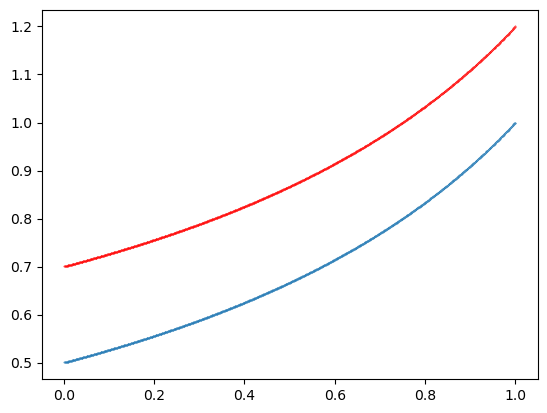

In [20]:
x = np.linspace(0.001, 1, 1000)
y = x / (1 - (1 - x)**2)
y2 = 1 / (2 - x) + 0.2

plt.scatter(x, y, s=0.1)
plt.scatter(x, y2, s=0.1, c='red')
plt.show();

In [7]:
def binom(p, k, n):
    return comb(n, k) * p ** k * (1-p) ** (n-k)


sum([comb(20, i) * (0.25 ** i) * (0.75 ** (20 - i)) for i in range(10, 21)])

0.01386441694376117

In [12]:
p = .25
n = 20

x = np.arange(0, n)

def binom_wrapper(p, n):
    def binom_w(k):
        return binom(p, k, n)
    return binom_w

y = np.vectorize(binom_wrapper(p, n))(x)

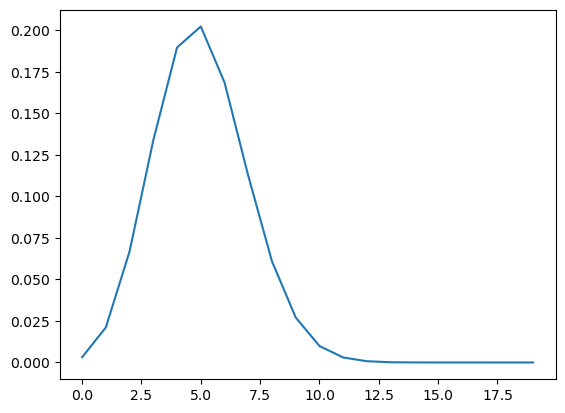

In [18]:
plt.plot(x, y);

In [56]:
def pmf(k):
    num = comb(4, k) *  (factorial(25) / factorial(25 - 4 + k)) * (factorial(5) / factorial(5 - k))
    denom =  factorial(30) / factorial(30 - 4)
    return num / denom

In [69]:
x = [0,1,2,3,4]
y = [pmf(a) for a in x]
cdf = np.cumsum(y)

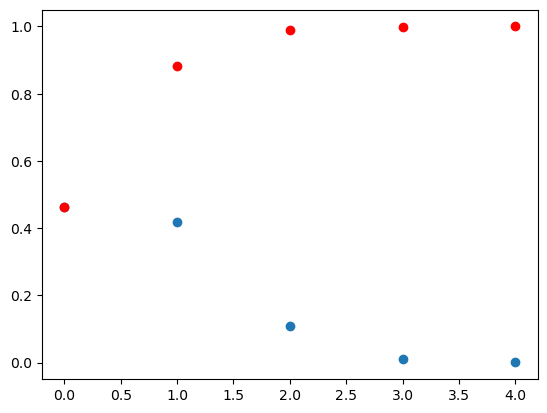

In [70]:
plt.scatter(x, y);
plt.scatter(x, cdf, c='red');
plt.show()

# Sampling simulation

In [38]:
samp = np.random.beta(a=1,b=1/2, size=1000)

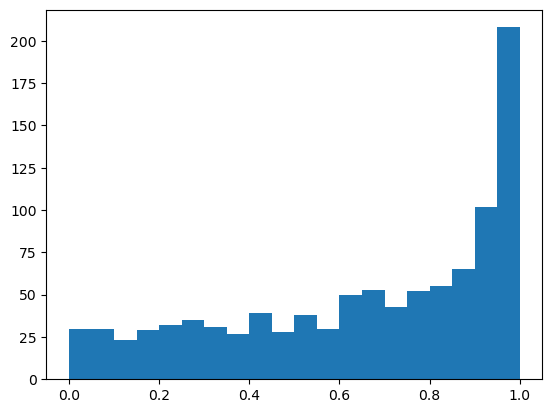

In [39]:
plt.hist(samp, bins=20);

In [40]:
samp_sorted = sorted(samp)

# Empirical cdf

In [41]:
percentiles = samp_sorted[::10]
y = np.linspace(0, 1, len(percentiles))


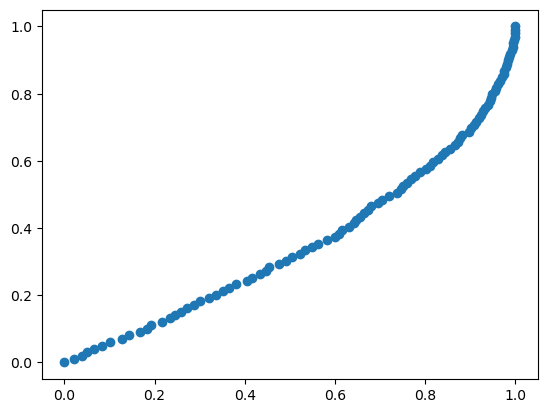

In [42]:
plt.scatter(percentiles, y);

In [43]:
# sample the cdf
from math import floor

ran = np.random.random(200)
res = []

for n in ran:
    idx = floor(len(percentiles) * n)
    res.append(percentiles[idx])

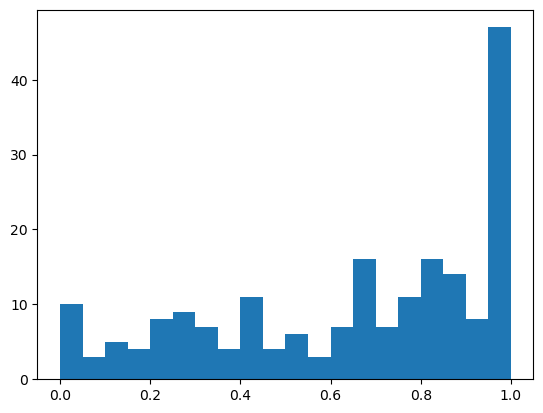

In [45]:
plt.hist(res, bins=20);